In [41]:
import sys
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/bmitchell/anaconda/envs/PY35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_111"; Java(TM) SE Runtime Environment (build 1.8.0_111-b14); Java HotSpot(TM) 64-Bit Server VM (build 25.111-b14, mixed mode)
  Starting server from /Users/bmitchell/anaconda/envs/PY35/h2o_jar/h2o.jar
  Ice root: /var/folders/g3/yh1hl4qx2j93vqj40hv6k50r0000gn/T/tmpa57b1zlc
  JVM stdout: /var/folders/g3/yh1hl4qx2j93vqj40hv6k50r0000gn/T/tmpa57b1zlc/h2o_bmitchell_started_from_python.out
  JVM stderr: /var/folders/g3/yh1hl4qx2j93vqj40hv6k50r0000gn/T/tmpa57b1zlc/h2o_bmitchell_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster version:,3.10.0.9
H2O cluster version age:,6 months and 16 days !!!
H2O cluster name:,H2O_from_python_bmitchell_7a6365
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [4]:
train = pd.read_csv("train.csv")

In [7]:
train['female'] = np.where(train['Sex']=='female', 1, 0)

In [8]:
match = train['SibSp'] + train['Parch']
train['isAlone'] = np.where(match > 0, 0, 1)

In [15]:
train['hasCabin'] = np.where(pd.isnull(train['Cabin']), 0, 1)

In [87]:
train['isChild'] = np.where(train['Age']<13, 1, 0)
train['wealthy'] = np.where((train['Fare'] >= 50) & (train['Pclass'] == 1 ),1,0)
train['HoH'] = np.where((train['Sex'] == 'male') & (train['Age'] >= 18 ) & (train['Parch'] != 0),1,0)
train['mother'] = np.where((train['Sex'] == 'female') & (train['Age'] >= 18 ) & (train['Parch'] != 0),1,0)

In [123]:
def get_titles():

    global combined
    
    # we extract the title from each name
    train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    train['Title'] = train.Title.map(Title_Dictionary)

In [124]:
get_titles()

In [120]:
train2 = train.drop(['Sex', 'SibSp', 'Parch', 'Cabin'], axis=1)

In [121]:
train2.to_csv('train2.csv', header ='column_names')

In [37]:
h2o.shutdown()
h2o.init(nthreads=-1, enable_assertions=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_111"; Java(TM) SE Runtime Environment (build 1.8.0_111-b14); Java HotSpot(TM) 64-Bit Server VM (build 25.111-b14, mixed mode)
  Starting server from /Users/bmitchell/anaconda/envs/PY35/h2o_jar/h2o.jar
  Ice root: /var/folders/g3/yh1hl4qx2j93vqj40hv6k50r0000gn/T/tmpore77vj0
  JVM stdout: /var/folders/g3/yh1hl4qx2j93vqj40hv6k50r0000gn/T/tmpore77vj0/h2o_bmitchell_started_from_python.out
  JVM stderr: /var/folders/g3/yh1hl4qx2j93vqj40hv6k50r0000gn/T/tmpore77vj0/h2o_bmitchell_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster version:,3.10.0.9
H2O cluster version age:,6 months and 16 days !!!
H2O cluster name:,H2O_from_python_bmitchell_mxmmvs
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [38]:
test = pd.read_csv("test.csv")

In [39]:
test['female'] = np.where(test['Sex']=='female', 1, 0)
match = test['SibSp'] + test['Parch']
test['isAlone'] = np.where(match > 0, 0, 1)
test['hasCabin'] = np.where(pd.isnull(test['Cabin']), 0, 1)
test['isChild'] = np.where(test['Age']<13, 1, 0)
test['wealthy'] = np.where((test['Fare'] >= 50) & (test['Pclass'] == 1 ),1,0)
test['HoH'] = np.where((test['Sex'] == 'male') & (test['Age'] >= 18 ) & (test['Parch'] != 0),1,0)
test['mother'] = np.where((test['Sex'] == 'female') & (test['Age'] >= 18 ) & (test['Parch'] != 0),1,0)
test2 = test.drop(['Sex', 'SibSp', 'Parch', 'Cabin'], axis=1)
test2.to_csv('test3.csv', header ='column_names')

In [47]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'female', 'isAlone',
       'hasCabin'],
      dtype='object')

In [109]:
train3 = train.drop(['PassengerId','Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1)

In [110]:
train3.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embarked', 'female', 'isAlone',
       'hasCabin', 'wealthy', 'isChild', 'HoH', 'mother'],
      dtype='object')

In [111]:
train3['Emb'] = np.where(train3['Embarked'] == 'C' ,1, np.where(train3['Embarked'] == 'Q',2, np.where(train3['Embarked'] == 'S', 3, 3))) 

In [112]:
del train3['Embarked']

In [113]:
train3.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'female', 'isAlone', 'hasCabin',
       'wealthy', 'isChild', 'HoH', 'mother', 'Emb'],
      dtype='object')

In [114]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         714 non-null float64
Fare        891 non-null float64
female      891 non-null int64
isAlone     891 non-null int64
hasCabin    891 non-null int64
wealthy     891 non-null int64
isChild     891 non-null int64
HoH         891 non-null int64
mother      891 non-null int64
Emb         891 non-null int64
dtypes: float64(2), int64(10)
memory usage: 83.6 KB


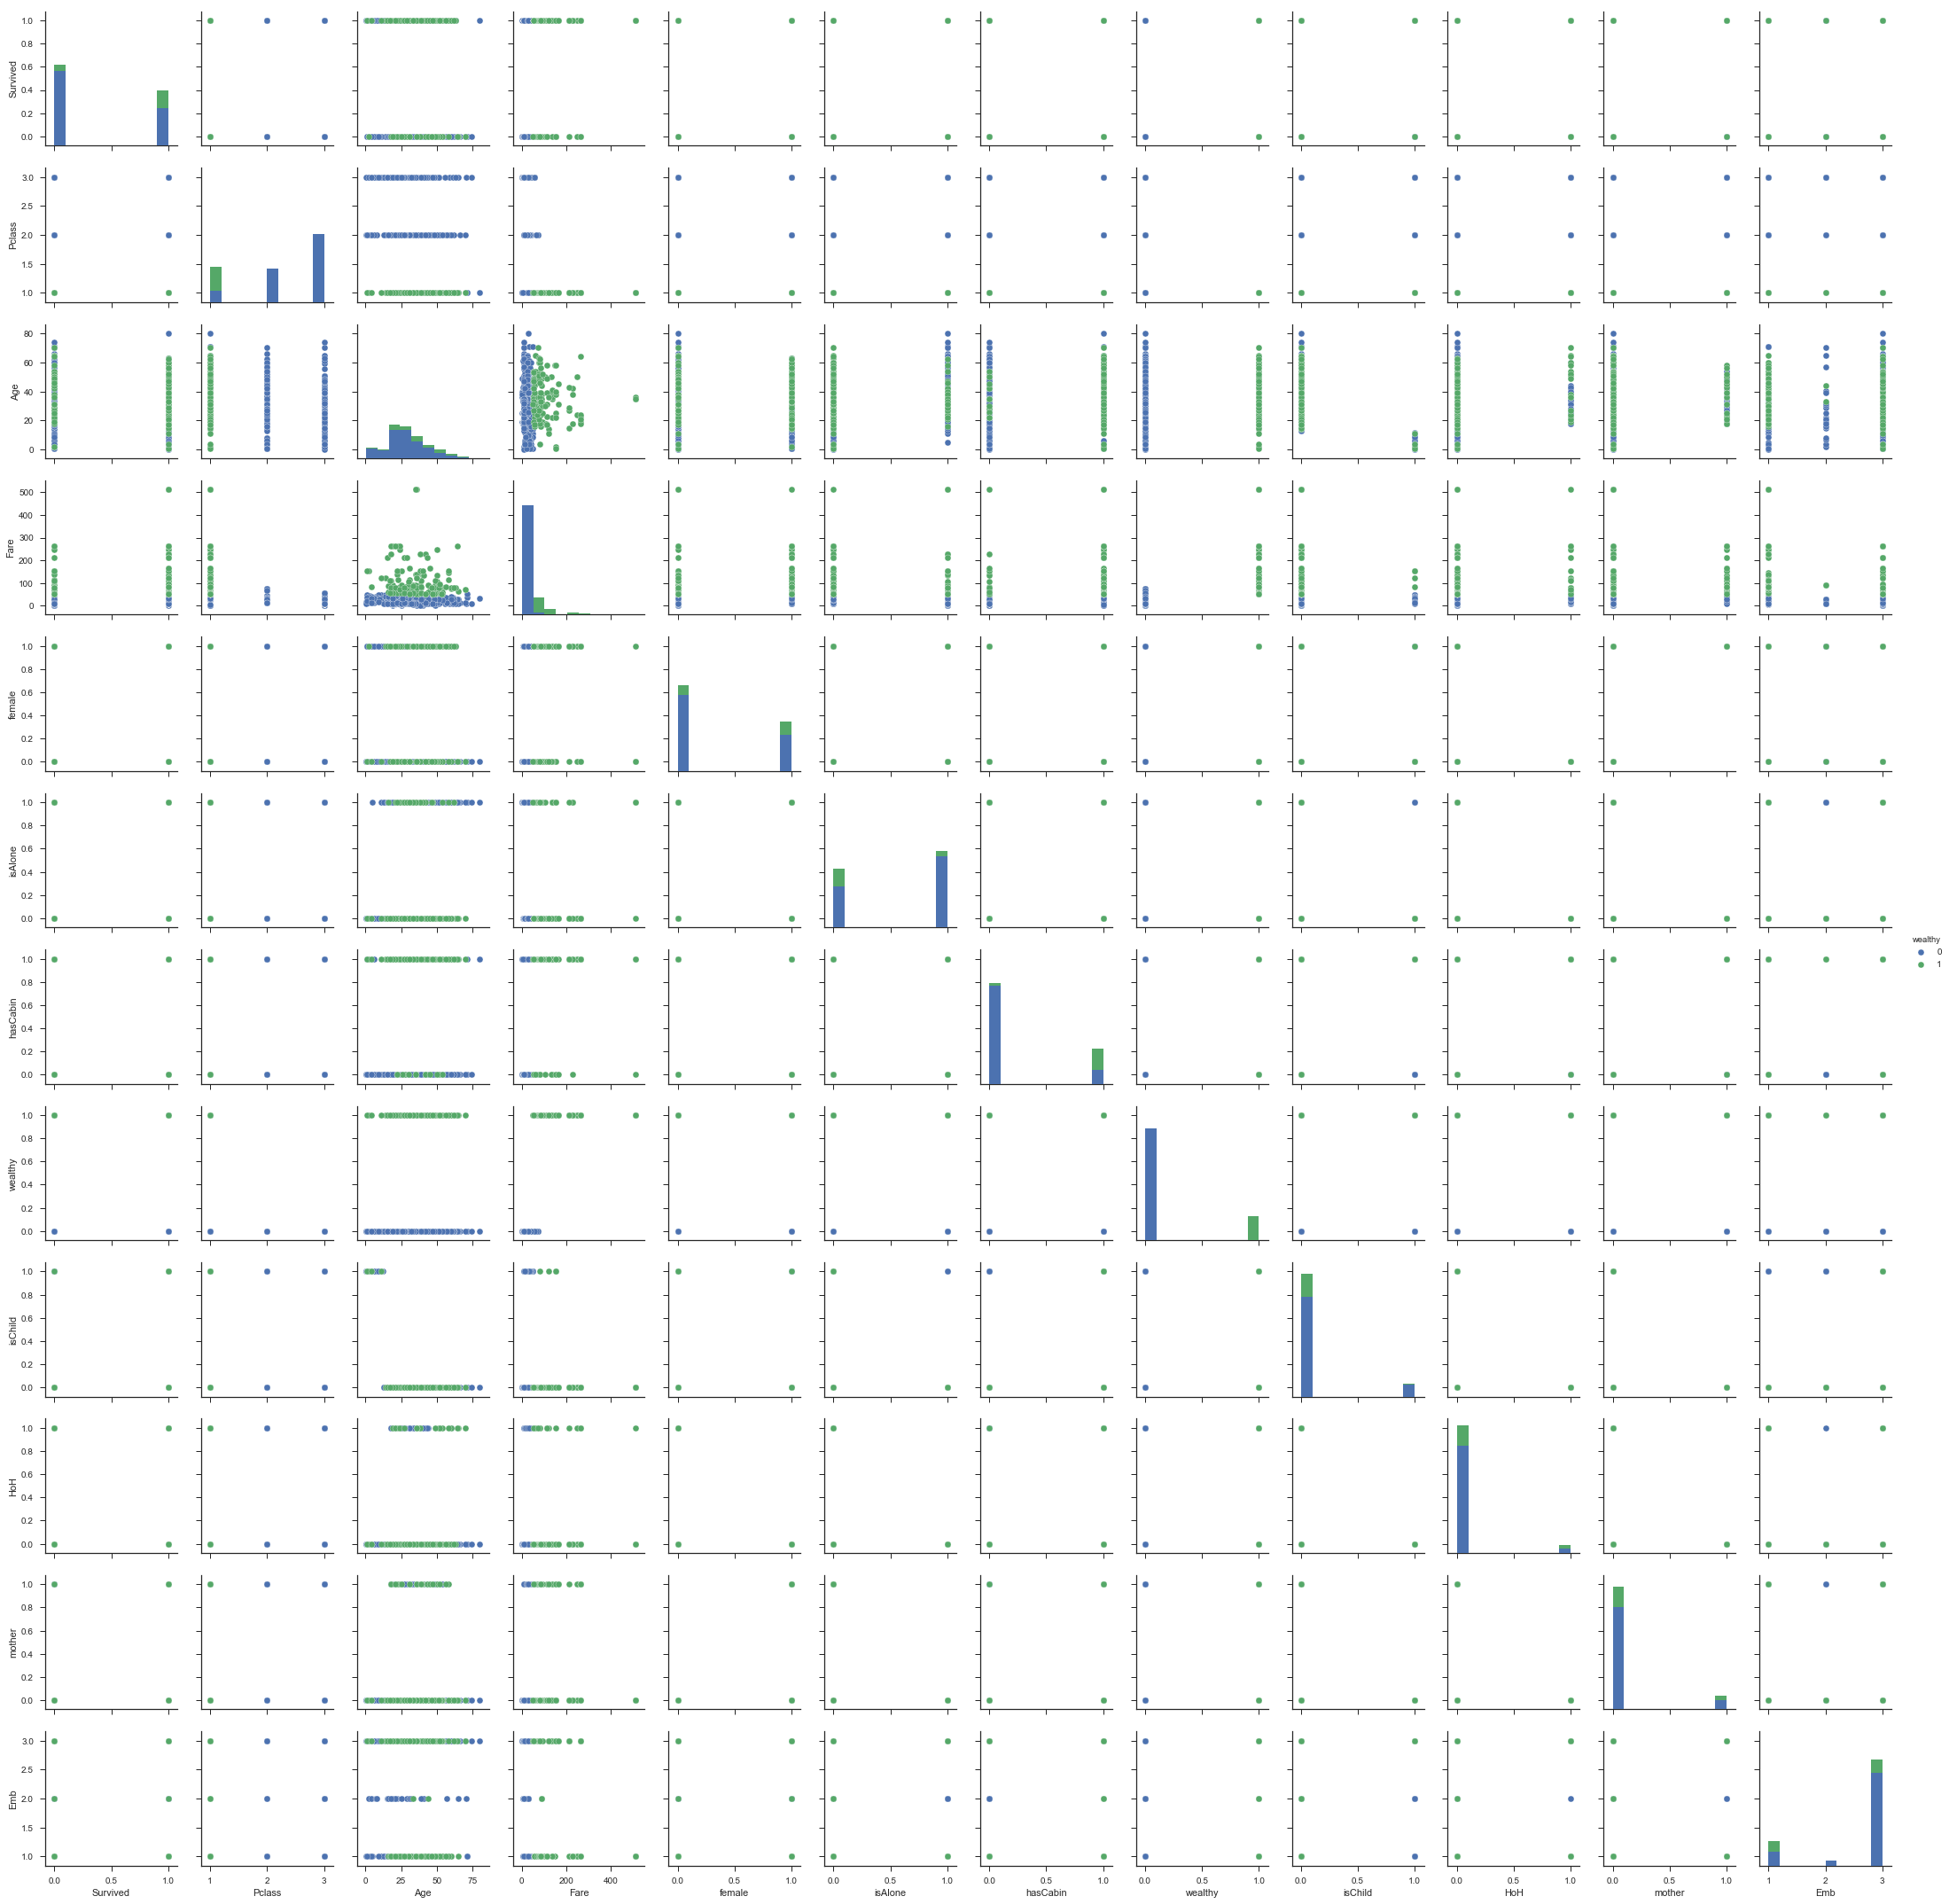

In [115]:
train3 = train3.dropna()
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(train3,hue="wealthy" ,dropna=True)

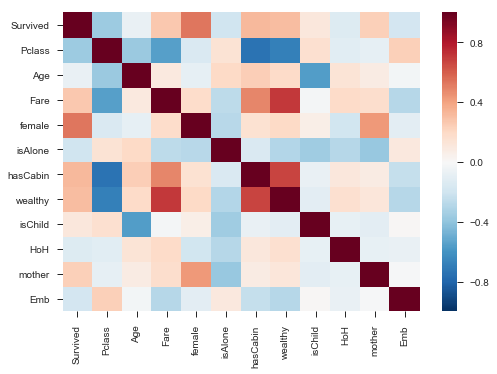

In [116]:
corr = train3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [122]:
test['female'] = np.where(test['Sex']=='female', 1, 0)
match = test['SibSp'] + test['Parch']
test['isAlone'] = np.where(match > 0, 0, 1)
test['hasCabin'] = np.where(pd.isnull(test['Cabin']), 0, 1)
test['isChild'] = np.where(test['Age']<13, 1, 0)
test['wealthy'] = np.where((test['Fare'] >= 50) & (test['Pclass'] == 1 ),1,0)
test['HoH'] = np.where((test['Sex'] == 'male') & (test['Age'] >= 18 ) & (test['Parch'] != 0),1,0)
test['mother'] = np.where((test['Sex'] == 'female') & (test['Age'] >= 18 ) & (test['Parch'] != 0),1,0)
test3 = test.drop(['Sex', 'SibSp', 'Parch', 'Cabin'], axis=1)
test3.to_csv('test3.csv', header ='column_names')

In [126]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('train.csv')
    
    # reading test data
    test = pd.read_csv('test.csv')

    # extracting and then removing the targets from the training data 
    #targets = train.Survived
    #train.drop('Survived', 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index', inplace=True, axis=1)
    
    return combined

In [131]:
combined = get_combined_data()

In [133]:
def get_titles(combined):

    #global combined
    
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                        }
    
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    
    return combined

In [135]:
combined = get_titles(combined)

In [140]:
def process_age(combined):
    
    #global combined
    
    grouped_train = combined.head(891).groupby(['Sex','Pclass','Title'])
    grouped_median_train = grouped_train.median()

    grouped_test = combined.iloc[891:].groupby(['Sex','Pclass','Title'])
    grouped_median_test = grouped_test.median()
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
    combined.head(891).Age = combined.head(891).apply(lambda r : fillAges(r, grouped_median_train) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    combined.iloc[891:].Age = combined.iloc[891:].apply(lambda r : fillAges(r, grouped_median_test) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    #status('age')
    return combined

In [141]:
combined = process_age(combined)
combined.info()

/Users/bmitchell/anaconda/envs/PY35/lib/python3.5/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


In [142]:
def process_embarked(combined):
    
    #global combined
    # two missing embarked values - filling them with the most frequent one (S)
    combined.head(891).Embarked.fillna('S', inplace=True)
    combined.iloc[891:].Embarked.fillna('S', inplace=True)
    
    
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    
    return combined

In [145]:

combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Embarked_C     1309 non-null uint8
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
dtypes: float64(3), int64(4), object(5), uint8(3)
memory usage: 126.6+ KB


In [152]:
combined['female'] = np.where(combined['Sex']=='female', 1, 0)
match = combined['SibSp'] + combined['Parch']
combined['isAlone'] = np.where(match > 0, 0, 1)
combined['hasCabin'] = np.where(pd.isnull(combined['Cabin']), 0, 1)
combined['isChild'] = np.where(combined['Age']<13, 1, 0)
combined['wealthy'] = np.where((combined['Fare'] >= 50) & (combined['Pclass'] == 1 ),1,0)
combined['HoH'] = np.where((combined['Sex'] == 'male') & (combined['Age'] >= 18 ) & (combined['Parch'] != 0),1,0)
combined['mother'] = np.where((combined['Sex'] == 'female') & (combined['Age'] >= 18 ) & (combined['Parch'] != 0),1,0)
combined = combined.drop(['Sex', 'SibSp', 'Parch', 'Cabin'], axis=1)

TypeError: 'NoneType' object is not subscriptable

In [153]:
np.where(combined['Sex']=='female', 1, 0)

TypeError: 'NoneType' object is not subscriptable